# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
#importing the data,creating a series and visualizing
data = pd.read_csv('paroleitaliane/parole_uniche.txt')
data = pd.Series(data.Parole)
data.head()

0         Aba
1       Abaco
2    Abagnale
3    Abagnali
4    Abagnato
Name: Parole, dtype: object

# Analysis

## Total and representations of borrowed words from other languages

In [3]:
#Total numbers of words in this dataset
total = data.count()
total

986698

In [4]:
#Alphabet and Italian alphabet, used for iteration
alphabet = ['a', 'b', 'c', 'd', 'e', 
            'f', 'g', 'h', 'i', 'j', 
            'k', 'l', 'm', 'n', 'o', 
            'p', 'q', 'r', 's', 't', 
            'u', 'v', 'w', 'x', 'y', 'z']

italian_alphabet = ['a', 'b', 'c', 'd', 'e', 
                    'f', 'g', 'h', 'i',  
                    'l', 'm', 'n', 'o', 
                    'p', 'q', 'r', 's', 't', 
                    'u', 'v', 'z']

In [5]:
#creating 2 lists, the first from the letters of the alphabet
#the "total_sum" is the sum of the words which starts with each one of the letters of the alphabet
italian_letters = []
italian_total_sum = []

#iteration, summing and appending the values into the lists
for letter in italian_alphabet:
    italian_letters.append(letter)
    italian_total_sum.append(int(data.str.startswith(letter).sum()))

In [6]:
#Total of italian words
italian_words_sum = sum(italian_total_sum)
italian_words_sum

941407

In [7]:
#number of borrowed words
borrowed_words = total - italian_words_sum
borrowed_words

45291

In [8]:
#borrowed words as total of the words
((total - italian_words_sum) / total) * 100

4.590158285513906

In [9]:
#creating dataframe for plotting
dic_1 = [['All_Words', total], ['Italian_Words',italian_words_sum]]
df1 = pd.DataFrame(dic_1)
df1 = df1.rename(columns={0:'Category', 1:'Total'})
df1

,Category,Total
0,All_Words,986698
1,Italian_Words,941407


Text(0.5, 1.0, 'Total of All Words, All Italian Words\n and Borrowed Words')

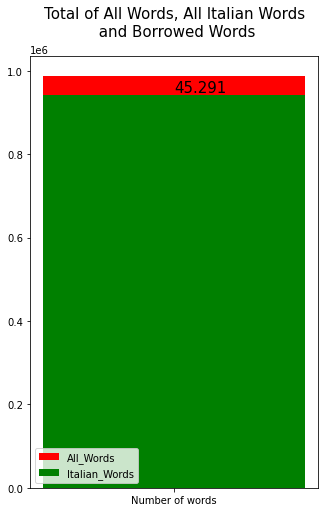

In [10]:
#creating figure
fig = plt.figure(figsize=(4,6))
fig.add_axes([0,0,1,1])

#barplot
plt.bar('Number of words', df1.iloc[0,1],color='red', width = 0.06, label=df1.iloc[0,0])
plt.bar('Number of words', df1.iloc[1,1],color='green', width = 0.06, label=df1.iloc[1,0])

#others
plt.legend(loc='lower left')
plt.annotate('45.291',xy=(0.0001,948000), fontsize=15)
plt.title('Total of All Words, All Italian Words\n and Borrowed Words', pad=20, fontsize=15)


## Creating the DataFrames from the alphabets

### Latin Alphabet

In [11]:
#creating 2 lists, the first from the letters of the alphabet
#the "total_sum" is the sum of the words which starts with each one of the letters of the alphabet
letters = []
total_sum = []

#iteration, summing and appending the values into the lists
for letter in alphabet:
    letters.append(letter)
    total_sum.append(int(data.str.startswith(letter).sum()))

In [12]:
#creating a Data Frame with the "Letters" and "Total_sum" lists
all_words_startswith = pd.DataFrame(total_sum, letters)

#renaming the columns
all_words_startswith = all_words_startswith.rename(columns={0:'Total'})

#creating the percentual column
all_words_startswith['Percentual'] = ((all_words_startswith.Total / total) *100).round(2)
all_words_startswith.head()

,Total,Percentual
a,90464,9.17
b,41501,4.21
c,81249,8.23
d,76451,7.75
e,23612,2.39


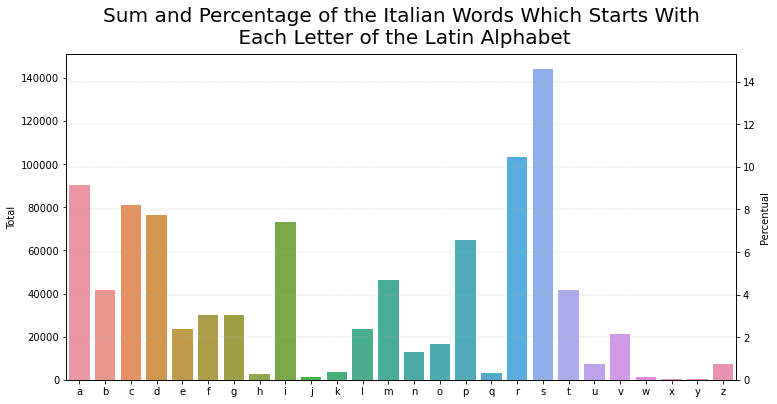

In [13]:
#creating figure
ax = plt.figure(figsize=(12,6))

#using seaborn to make to first plot
ax = sns.barplot(data=all_words_startswith, 
                                x=all_words_startswith.index, 
                                y=all_words_startswith.Total)

#creating the second y-axis
ax2 = ax.twinx()
ax2 = ax = sns.barplot(data=all_words_startswith, 
                                x=all_words_startswith.index, 
                                y=all_words_startswith.Percentual)
#Title, grid and save
ax.set_title('Sum and Percentage of the Italian Words Which Starts With\n Each Letter of the Latin Alphabet', 
             fontsize=20, pad=10)
ax.grid(True, linestyle='--', linewidth=0.3)
plt.savefig("graf1.jpg")

ax=ax

### Italian Alphabet

In [14]:
#creating 2 lists, the first from the letters of the italian alphabet
#the "_italian_total_sum" is the sum of the words which starts with each one of the letters of the alphabet
italian_letters = []
italian_total_sum = []

#iteration, summing and appending the values into the lists
for letter in italian_alphabet:
    italian_letters.append(letter)
    italian_total_sum.append(int(data.str.startswith(letter).sum()))

In [15]:
#creating a Data Frame with the "Letters" and "Total_sum" lists
italian_all_words_startswith = pd.DataFrame(italian_total_sum, italian_letters)

#renaming the columns
italian_all_words_startswith = italian_all_words_startswith.rename(columns={0:'Total'})

#creating the percentual column
italian_all_words_startswith['Percentual'] = ((italian_all_words_startswith.Total / total) *100).round(2)
italian_all_words_startswith.head()

,Total,Percentual
a,90464,9.17
b,41501,4.21
c,81249,8.23
d,76451,7.75
e,23612,2.39


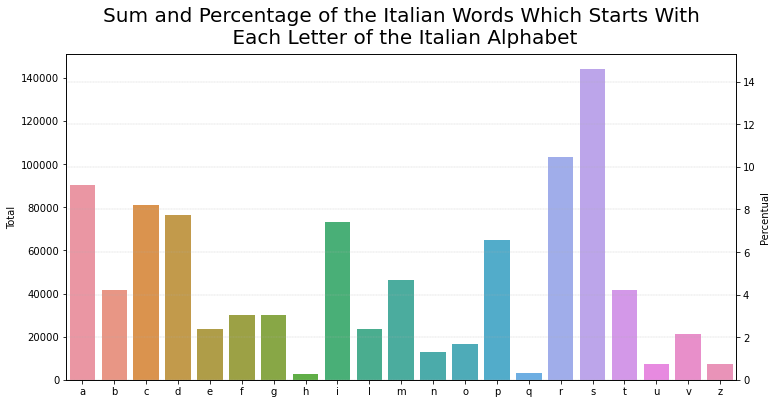

In [16]:
#creating figure
ax = plt.figure(figsize=(12,6))

#using seaborn to make to first plot
ax = sns.barplot(data=italian_all_words_startswith, 
                                x=italian_all_words_startswith.index, 
                                y=italian_all_words_startswith.Total)

#creating the second y-axis
ax2 = ax.twinx()
ax2 = ax = sns.barplot(data=italian_all_words_startswith, 
                                x=italian_all_words_startswith.index, 
                                y=italian_all_words_startswith.Percentual)
#Title, grid and save
ax.set_title('Sum and Percentage of the Italian Words Which Starts With\n Each Letter of the Italian Alphabet', 
             fontsize=20, pad=10)
ax.grid(True, linestyle='--', linewidth=0.3)
plt.savefig("graf2_italian.jpg")

ax=ax

In [17]:
#exporting the csv files
all_words_startswith.to_csv('all_words_startswith.csv')
italian_all_words_startswith.to_csv('italian_all_words_startswith.csv')

## Counting the number of letters in each word

In [18]:
#converting series to dataframe
data = data.to_frame()

In [19]:
#creating a new column for counting the total sum of the letter in each word
data['number_letters'] = data['Parole'].str.len()

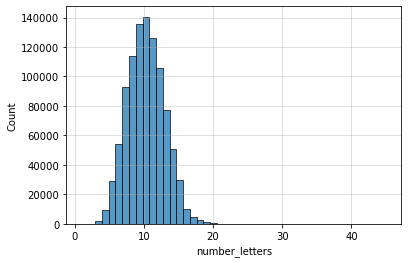

In [20]:
#plotting
histogram = sns.histplot(data['number_letters'], bins=45, fill=True,)
histogram.grid(True, alpha=0.5)

## Counting each letter

In [21]:
#lowering all letters in each word
data = data['Parole'].str.lower()
data = data.to_frame()

In [26]:
#creating columns and counting the letters in each word
for letter in italian_alphabet:
    data[letter] = data.Parole.str.count(letter)

#visualizing
data.head()

,Parole,a,b,c,d,e,f,g,h,i,...,n,o,p,q,r,s,t,u,v,z
0,aba,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abaco,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abagnale,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abagnali,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,abagnato,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
#creating 2 empty lists for data frame creation
letter_sum = []
total_letter_sum = []

#iterating the italian alphabet and appending each letter and its sum into the new lists
for letter in italian_alphabet:
    letter_sum.append(letter)
    total_letter_sum.append(data[letter].sum())

#creating and renaming the dataframe
df_sum_letters = pd.DataFrame(total_letter_sum, letter_sum)
df_sum_letters.rename(columns={0:'Total'})
df_sum_letters

,0
a,1124997.0
b,194532.0
c,482311.0
d,236898.0
e,995039.0
f,134137.0
g,246052.0
h,89143.0
i,1209959.0
l,416661.0


<AxesSubplot:>

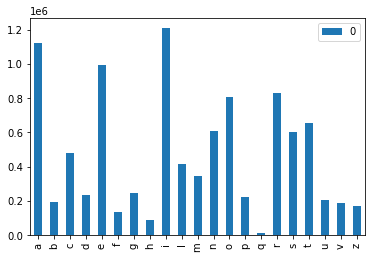

In [46]:
df_sum_letters.plot(kind='bar')

In [23]:
#contar o numero de letras nas palavras

In [24]:
#contar vogais e consoantes